In [1]:
import pandas as pd
import numpy as np
from qfntools import DynamicBeta

In [2]:
etf = pd.read_excel('./data/biggestETFData.xlsx',index_col = 0)
etfRet = etf.pct_change().dropna()
etfRet

,SPY US Equity,VTI US Equity,QQQ US Equity,VTV US Equity,IWF US Equity,VUG US Equity,IWM US Equity,IWD US Equity,VO US Equity,VYM US Equity,...,XLY US Equity,XLP US Equity,XLU US Equity,IWP US Equity,XLI US Equity,IWS US Equity,VOE US Equity,IWV US Equity,IWO US Equity,SCHG US Equity
2010-01-04,0.016960,0.016676,0.014645,0.016754,0.013039,0.016773,0.024664,0.019512,0.018682,0.013158,...,0.007726,0.007556,0.001934,0.014116,0.019072,0.015968,0.014650,0.016850,0.025415,0.016760
2010-01-05,0.002647,0.003839,0.000000,0.003296,0.000198,0.002595,-0.003439,0.005981,0.004749,0.000000,...,0.003667,0.000375,-0.011905,0.003262,0.003531,0.008258,0.003110,0.002561,-0.002579,0.002647
2010-01-06,0.000704,0.001391,-0.006032,0.003285,0.000000,0.000370,-0.000941,0.003397,0.006193,0.002078,...,0.001328,-0.000750,0.005861,0.003685,0.002111,0.003699,0.007086,0.001953,0.001724,-0.000754
2010-01-07,0.004221,0.004166,0.000650,0.005525,0.000792,0.001478,0.007378,0.008465,0.004859,0.001814,...,0.008292,0.000000,-0.004532,0.002160,0.010885,0.007107,0.007256,0.003449,0.002581,0.003019
2010-01-08,0.003328,0.003284,0.008230,0.001018,0.005539,0.006090,0.005454,0.002350,0.003868,0.001811,...,-0.000329,-0.003376,-0.000976,0.003017,0.015978,0.004705,0.003274,0.003587,0.004005,0.006396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,0.010479,0.009661,0.015360,0.007195,0.012549,0.014238,0.008318,0.008009,0.008971,0.006489,...,0.009753,0.001262,0.004106,0.011768,0.006466,0.008317,0.007686,0.010620,0.010537,0.013631
2020-01-29,-0.000826,-0.000662,0.001626,-0.004455,0.002193,0.002156,-0.005701,-0.004267,-0.003921,-0.005373,...,-0.000559,-0.005042,0.002629,-0.003369,0.005333,-0.003596,-0.004023,-0.001098,-0.004134,0.002069
2020-01-30,0.003245,0.002409,0.003562,0.004390,0.001915,0.002518,0.000000,0.004581,0.001774,0.004105,...,-0.001677,0.011876,0.009323,0.001977,0.001085,0.002653,0.002609,0.002983,-0.002030,0.003200
2020-01-31,-0.018158,-0.017662,-0.015858,-0.017820,-0.017530,-0.016799,-0.020741,-0.017652,-0.016326,-0.017000,...,0.002560,-0.011268,-0.004474,-0.020113,-0.023124,-0.016301,-0.016283,-0.017585,-0.020198,-0.017288


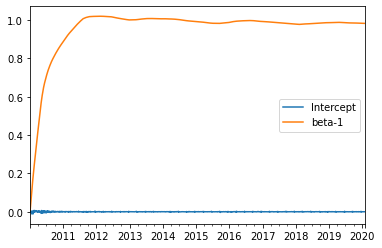

In [3]:
# In CAPM: beta is the coefficient in the regression formula: rM = intercept + beta * r + error 
# rM = market return, we use SPY as proxy
# r = return of asset
marketRet = pd.DataFrame(etfRet['SPY US Equity'])
stock = pd.DataFrame(etfRet['VTI US Equity'])
db = DynamicBeta()

# since observable "factor" is market return, which is 1-dimensional, we don't need PCA to decompose it
db.fit(stock, marketRet,  factor_pca=False)

# plot Kalman smoother: E[beta_t | observation of rM up to time T]
db.plot(smoothed=True)

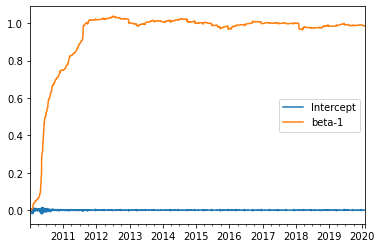

In [4]:
# plot Kalman filter: E[beta_t | rM_t]
# Kalman filter is a step-wise process, It updates new expectation of beta on every new observation of rM 
db.plot(smoothed=False)